In [6]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

In [7]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<AxesSubplot:xlabel='wt', ylabel='mpg'>

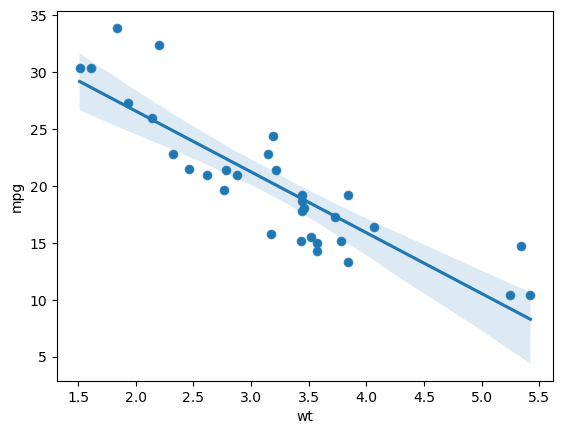

In [8]:
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [9]:
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values.tolist()
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y = torch.tensor(y_list)

In [10]:
w = torch.rand(1, requires_grad=True, dtype=torch.float64)
b = torch.rand(1, requires_grad=True, dtype=torch.float64)

num_epochs = 100
learning_rate = 1e-3
for epoch in range(num_epochs):
  for i in range(len(X)):
    # x, y = torch.tensor(X_list[i]), torch.tensor(y_list[i])
    # forward pass
    y_predict = X[i] * w + b
    # calculate loss
    loss_tensor = torch.pow(y_predict - y[i], 2)
    # backward pass
    loss_tensor.backward()
    # extract losses
    loss_value = loss_tensor.data[0]
    # update weights and biases
    with torch.no_grad():
      w -= w.grad * learning_rate
      b -= b.grad * learning_rate
      w.grad.zero_()
      b.grad.zero_()
  print(loss_value)

tensor(163.3968, dtype=torch.float64)
tensor(83.1459, dtype=torch.float64)
tensor(55.3967, dtype=torch.float64)
tensor(44.4433, dtype=torch.float64)
tensor(39.6513, dtype=torch.float64)
tensor(37.3470, dtype=torch.float64)
tensor(36.1054, dtype=torch.float64)
tensor(35.3319, dtype=torch.float64)
tensor(34.7688, dtype=torch.float64)
tensor(34.3020, dtype=torch.float64)
tensor(33.8807, dtype=torch.float64)
tensor(33.4821, dtype=torch.float64)
tensor(33.0958, dtype=torch.float64)
tensor(32.7173, dtype=torch.float64)
tensor(32.3444, dtype=torch.float64)
tensor(31.9762, dtype=torch.float64)
tensor(31.6122, dtype=torch.float64)
tensor(31.2523, dtype=torch.float64)
tensor(30.8962, dtype=torch.float64)
tensor(30.5439, dtype=torch.float64)
tensor(30.1953, dtype=torch.float64)
tensor(29.8504, dtype=torch.float64)
tensor(29.5092, dtype=torch.float64)
tensor(29.1717, dtype=torch.float64)
tensor(28.8377, dtype=torch.float64)
tensor(28.5072, dtype=torch.float64)
tensor(28.1802, dtype=torch.float64)


In [11]:
print(f"Weight: {w.item()}, Bias: {b.item()}")

Weight: 0.9738835528255924, Bias: 15.323482665789665


In [12]:
y_pred = (torch.tensor(X_list)*w+b).detach().numpy()

<AxesSubplot:>

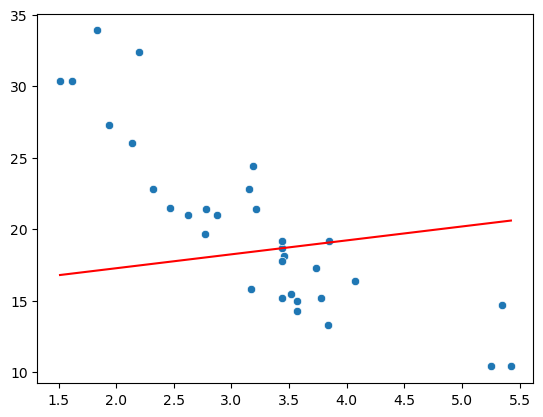

In [13]:
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_np, y_list)
print(f"Slope: {reg.coef_}, Bias: {reg.intercept_}")

Slope: [-5.3444715], Bias: 37.285125732421875


In [15]:
import graphviz as gv
print(gv.__version__)

0.20.1


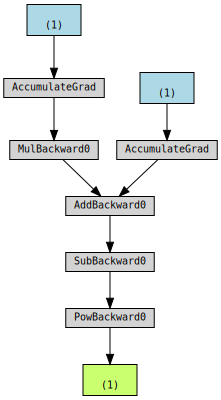

In [16]:
from torchviz import make_dot
make_dot(loss_tensor)